In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [2]:
products_data=pd.read_csv('balancedDATA.csv')
products_data

,NameDescription,categories
0,surco a conversion bar bike rack featuresused ...,Automotive
1,kent marine turbo calcium ounce bottle turbo ...,Pet Supplies
2,inch pro style swim snorkel breathe underwater...,Sports & Outdoors
3,zia natural skincare seaweed lift serum ounce ...,Beauty
4,nexcare waterproof bandage knee amp elbow ct ...,Health & Personal Care
...,...,...
35761,palladio rice paper natural unique tissue made...,"Arts, Crafts & Sewing"
35762,learning resource tool set piece molded plasti...,Toys & Games
35763,serious skin care aeye xr nanoencapsulated eye...,Beauty
35764,wireless phone xcessories travel charger samsu...,Cell Phones & Accessories


In [3]:
products_data['categories'].unique().shape

(18,)

# Extracting Features From TextData using TF-IDF

In [4]:
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

In [5]:
Text=[]
for text in products_data["NameDescription"]:
    Text.append(text)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
# First, we need a vectorizer object
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(Text).toarray()
xx=  pd.DataFrame(x)
xx

,0,1,2,3,4,5,6,7,8,9,...,99060,99061,99062,99063,99064,99065,99066,99067,99068,99069
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After feature extraction from our text it gives 99070 features.

# Label 

In [7]:
l=[]
for text in products_data["categories"].unique():
    l.append(text)

In [8]:

y = []

for text in products_data["categories"]:
    for j in range(18):
        if text==l[j]:
            y.append(j)
    
y = np.asarray(y)

yy = pd.Series(y)
yy

0        0
1        1
2        2
3        3
4        4
        ..
35761    5
35762    7
35763    3
35764    6
35765    7
Length: 35766, dtype: int64

### We will trying to find the best peurcentage of features that can we use and give us more best accuraccy

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.2)

In [10]:
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import accuracy_score
import pickle
from sklearn.neural_network import MLPClassifier


def select_features_CH2(x_train, y_train, x_test):
    #CH2 = SelectKBest(score_func=chi2, k=3390)
    CH2 = SelectPercentile(chi2, percentile=50)
    CH2.fit(x_train, y_train)
    x_train_CH2 = CH2.transform(x_train)
    x_test_CH2 = CH2.transform(x_test)
    return x_train_CH2, x_test_CH2, CH2

accuracies = {}

for p in range(5, 100, 5):
    print("Percentage of features is:", p)
    x_train_CH2, x_test_CH2, CH2 = select_features_CH2(x_train, y_train, x_test)
    n = x_train_CH2.shape[1]
    print("Number of features is:", n)
    classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, verbose=True)
    classifier.fit(x_train_CH2, y_train)
    y_pred = classifier.predict(x_test_CH2)
    accuracy = round(accuracy_score(y_pred,y_test)*100,2)
    print("Accuracy for the {} best features is: {}%".format(n, accuracy))
    ss = "p-"+str(p)+"_n-"+str(n)+"_acc-"+str(accuracy)+".pickle"
    pickle.dump(classifier, open(ss, "wb"))
    accuracies[p] = [n, accuracy, ss]

Percentage of features is: 5
Number of features is: 49535
Iteration 1, loss = 2.47782080
Iteration 2, loss = 1.28126556
Iteration 3, loss = 0.64640959
Iteration 4, loss = 0.40180780
Iteration 5, loss = 0.27596899
Iteration 6, loss = 0.19804959
Iteration 7, loss = 0.14670515
Iteration 8, loss = 0.11084904
Iteration 9, loss = 0.08567973
Iteration 10, loss = 0.06765545
Iteration 11, loss = 0.05484412
Iteration 12, loss = 0.04541440
Iteration 13, loss = 0.03828705
Iteration 14, loss = 0.03303383
Iteration 15, loss = 0.02895739
Iteration 16, loss = 0.02571767
Iteration 17, loss = 0.02320196
Iteration 18, loss = 0.02111273
Iteration 19, loss = 0.01944769
Iteration 20, loss = 0.01809079
Accuracy for the 49535 best features is: 87.73%
Percentage of features is: 10
Number of features is: 49535
Iteration 1, loss = 2.48041048
Iteration 2, loss = 1.26560225
Iteration 3, loss = 0.63493754
Iteration 4, loss = 0.39490067
Iteration 5, loss = 0.27059580
Iteration 6, loss = 0.19405165
Iteration 7, loss 

Iteration 2, loss = 1.26612372
Iteration 3, loss = 0.63018977
Iteration 4, loss = 0.39006059
Iteration 5, loss = 0.26697616
Iteration 6, loss = 0.19137328
Iteration 7, loss = 0.14117244
Iteration 8, loss = 0.10664461
Iteration 9, loss = 0.08274675
Iteration 10, loss = 0.06526173
Iteration 11, loss = 0.05289900
Iteration 12, loss = 0.04389938
Iteration 13, loss = 0.03714013
Iteration 14, loss = 0.03212777
Iteration 15, loss = 0.02815801
Iteration 16, loss = 0.02513062
Iteration 17, loss = 0.02249546
Iteration 18, loss = 0.02073231
Iteration 19, loss = 0.01898395
Iteration 20, loss = 0.01758832
Accuracy for the 49535 best features is: 87.87%
Percentage of features is: 65
Number of features is: 49535
Iteration 1, loss = 2.47722025
Iteration 2, loss = 1.26428668
Iteration 3, loss = 0.63760303
Iteration 4, loss = 0.39688527
Iteration 5, loss = 0.27288159
Iteration 6, loss = 0.19611017
Iteration 7, loss = 0.14519999
Iteration 8, loss = 0.10981207
Iteration 9, loss = 0.08471917
Iteration 10, 

### reload the model saved with 88.09% as accuracy

In [22]:
# Load model already saved
import pickle

classifier = pickle.load(open("p-75_n-49535_acc-88.09.pickle","rb"))
#CH2 = SelectPercentile(chi2, percentile=50)
x_test_CH2 = CH2.transform(x_test)
y_pred = classifier.predict(x_test_CH2)
print(round(accuracy_score(y_pred,y_test)*100,2))

88.09


In [16]:
x_test_CH2 = CH2.transform(x_test)

### Confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

#Function to plot confusion matrix for the passed model and the data
def plot_confusion_matrix(model, X_test, y_test):
    
    classes = products_data.categories.unique()
    # use model to do the prediction
    y_pred = model.predict(x_test_CH2)
    # compute confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=classes,
                yticklabels=classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Predicted label', fontsize=12)
    plt.ylabel('Actual label', fontsize=12)

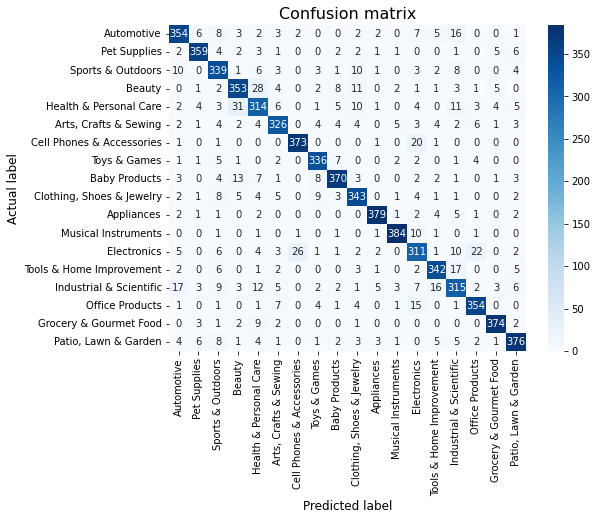

In [20]:
plot_confusion_matrix(classifier, x_test, y_test)